# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Assaf 7038
# student 2: Liat 8608
# student 3: Roy 1777

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#Imports
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline


In [3]:
#Load train and test dataset + present 5 rows of each dataset
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

display(df_train.head(), df_test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [4]:
#Two tables:

#Table 1: Average Fare and Age by Embarkment Point
avg_fare_age_embarked = df_train.pivot_table(
    index='Embarked',
    values=['Fare', 'Age'],
    aggfunc=np.mean
)
print("Average Fare and Age by Embarkment Point:")
display(avg_fare_age_embarked)

Average Fare and Age by Embarkment Point:


C:\Users\assaf\AppData\Local\Temp\ipykernel_28860\2595413505.py:4: FutureWarning: The provided callable <function mean at 0x00000246D84AFD80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_fare_age_embarked = df_train.pivot_table(


,Age,Fare
Embarked,,
0,29.306410,26.750380
1,30.060990,62.395119
2,29.716608,13.910353
3,62.000000,80.000000


In [5]:
#Table 2: Pearson coefficient:
df_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


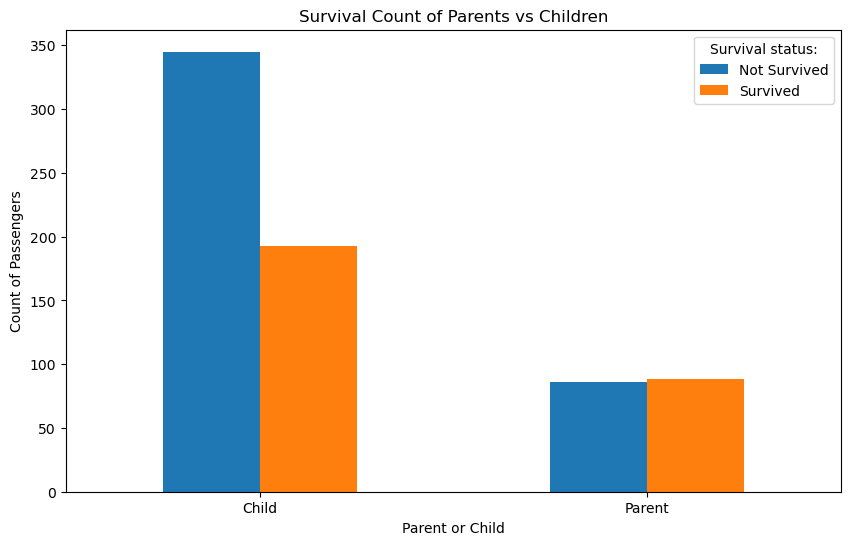

In [6]:
#Two visualizations:
# Visualization 1: Survival Count of Parents vs Children
df_train['IsParentOrChild'] = df_train['Parch'].apply(lambda x: 'Parent' if x > 0 else 'Child')
parent_child_survival_counts = df_train.groupby(['IsParentOrChild', 'Survived']).size().unstack()
parent_child_survival_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival Count of Parents vs Children')
plt.xlabel('Parent or Child')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survival status:', labels=['Not Survived', 'Survived'])
plt.show()

<Figure size 1000x600 with 0 Axes>

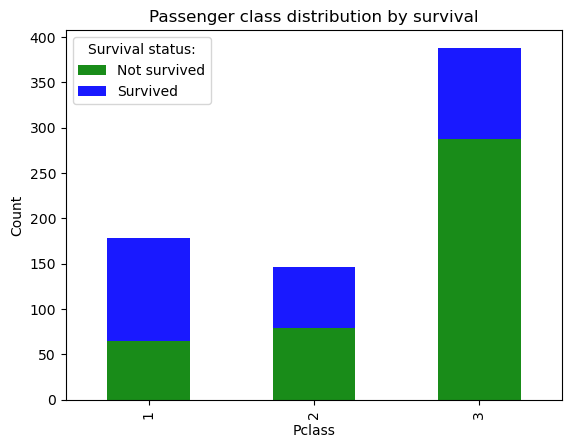

In [7]:
# Visualization 2: Fare Distribution by Survival Status
plt.figure(figsize=(10,6))

pclass_survived_count=df_train.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

pclass_survived_count.plot(kind='bar', stacked=True, color=['green', 'blue'], alpha = 0.9)
plt.title('Passenger class distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not survived', 'Survived'], title='Survival status:')
plt.xticks(ticks=[0,1,2], labels=['1', '2', '3'])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
#Feature engineering metric: MinMax Scaling
features = ['Pclass', 'Age', 'Sex', 'SibSp', 'Fare', 'Parch', 'Embarked']

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_train[features])

# Transform the training data
df_train_scaled = df_train.copy()
df_train_scaled[features] = scaler.transform(df_train[features])

# Transform the test data
df_test_scaled = df_test.copy()
df_test_scaled[features] = scaler.transform(df_test[features])

display(df_train_scaled.head(), df_test_scaled.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,IsParentOrChild
0,-1.0,-1.0,0.344510,-0.75,-1.0,-0.694467,-0.333333,1,Child
1,0.0,-1.0,0.117610,-1.00,-1.0,-0.947300,-1.000000,1,Child
2,1.0,1.0,-0.512669,-1.00,-1.0,-0.962914,-1.000000,0,Child
3,1.0,1.0,-0.109290,-1.00,-1.0,-0.969177,-1.000000,0,Child
4,1.0,1.0,-0.462246,-1.00,-1.0,-0.968575,-1.000000,0,Child


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-0.134501,-1.0,-1.0,-0.972479,-1.000000,0
1,1.0,1.0,-0.260557,-1.0,-1.0,-0.971698,-1.000000,0
2,1.0,1.0,-0.268143,-1.0,-1.0,-0.943396,-1.000000,0
3,1.0,-1.0,-0.487457,-1.0,-1.0,-0.969746,0.333333,0
4,1.0,1.0,-0.210135,-1.0,-1.0,-0.779455,-1.000000,1


In [9]:
#KNN
df_train_scaled.dropna(subset=features + ['Survived'], inplace=True)

X_train = df_train_scaled[features]
y_train = df_train_scaled['Survived']

# Define the parameter grid for KNN
knn_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a pipeline that includes scaling and KNN
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),
    ('knn', KNeighborsClassifier())
])

# Initialize GridSearchCV with KNN and the parameter grid
grid_search = GridSearchCV(pipeline, param_grid=knn_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

cv_results = pd.DataFrame(grid_search.cv_results_)
options = ['param_knn__n_neighbors', 'param_knn__metric', 'mean_test_score', 'std_test_score']

print("Cross-validation Accuracy Scores:")
display(cv_results[options])

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("\nBest Parameters for KNN:", best_params)
print("Best Accuracy for KNN:", best_accuracy)

Cross-validation Accuracy Scores:


,param_knn__n_neighbors,param_knn__metric,mean_test_score,std_test_score
0,3,euclidean,0.796375,0.029280
1,5,euclidean,0.785118,0.038930
2,7,euclidean,0.780951,0.030819
3,9,euclidean,0.778144,0.029190
4,3,manhattan,0.797794,0.025683
5,5,manhattan,0.787935,0.034219
6,7,manhattan,0.786536,0.021846
7,9,manhattan,0.780942,0.026073
8,3,chebyshev,0.786536,0.029535
9,5,chebyshev,0.782311,0.031720



Best Parameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Best Accuracy for KNN: 0.7977937555402344


In [10]:
# Naive bayes
# Define the parameter grid for Naive Bayes
nb_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline that includes scaling and Naive Bayes
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),
    ('nb', GaussianNB())
])

# Initialize GridSearchCV with Naive Bayes and the parameter grid
grid_search = GridSearchCV(pipeline, param_grid=nb_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

cv_results = pd.DataFrame(grid_search.cv_results_)

print("Cross-validation Accuracy Scores:")
display(cv_results[['param_nb__var_smoothing', 'mean_test_score', 'std_test_score']])

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("\nBest Parameters for Naive Bayes:", best_params)
print("Best Accuracy for Naive Bayes:", best_accuracy)

Cross-validation Accuracy Scores:


,param_nb__var_smoothing,mean_test_score,std_test_score
0,0.0,0.780892,0.031005
1,0.0,0.780892,0.031005
2,0.0,0.780892,0.031005
3,0.000001,0.780892,0.031005
4,0.00001,0.780892,0.031005



Best Parameters for Naive Bayes: {'nb__var_smoothing': 1e-09}
Best Accuracy for Naive Bayes: 0.7808923470895301


In [11]:
# 5-fold-cross-validation using grid search:
scaler = MinMaxScaler()

# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define hyperparameter grids
param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__metric': ['euclidean', 'manhattan', 'chebyshev']
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
}

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best F1 Score'])

f1_macro_scorer = make_scorer(f1_score, average='macro')
rows = []

for model_name, model in models.items():
    # Create pipeline with scaler and model
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    
    param_grid = param_grids[model_name]
    
    # Perform GridSearchCV with 5-fold cross-validation and f1 scoring
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    rows.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best F1 Score': best_score
    })

results_df = pd.DataFrame(rows)
print("Results for each model and parameter combination:")
results_df

Results for each model and parameter combination:


,Model,Best Parameters,Best F1 Score
0,KNN,"{'classifier__metric': 'manhattan', 'classifie...",0.786029
1,Naive Bayes,{'classifier__var_smoothing': 1e-09},0.768966


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
scaler.fit(df_train_scaled[features])

# Transform the entire training data with the scaler
X_train_scaled = scaler.transform(df_train_scaled[features])
y_train = df_train_scaled['Survived']

# Initialize KNN classifier with best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train the KNN classifier on the entire training set
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## Part 5 - Apply on test and show model performance estimation

In [13]:
X_test_scaled = scaler.transform(df_test_scaled[features])
y_test = df_test['Survived']

y_pred = best_knn.predict(X_test_scaled)

# Evaluatation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Performance on Test Set:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Model Performance on Test Set:
Accuracy: 0.8435754189944135

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.77      0.77      0.77        61

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

